In [2]:
exec(open("objet.py").read(), globals())

In [3]:
Param1 = np.linspace(0.3, 0.6, 10)
Param2 = np.linspace(0.2, 2., 30)
Final_N = np.zeros((len(Param1), len(Param2)))
Final_W = np.zeros_like(Final_N)

for i, param1 in enumerate(Param1):
    for j, param2 in enumerate(Param2):
        O = Ode(model = "allee_effect_adi", solveur = "odeint", Init=[0.5, 0.5], Param_phy= [param1, param2], finalTime = 50)
        O.perturbation()
        Y  = O.solve_by_part()
        Final_N[i,j], Final_W[i,j] = Y[:,-1]

Text(0, 0.5, 'm')

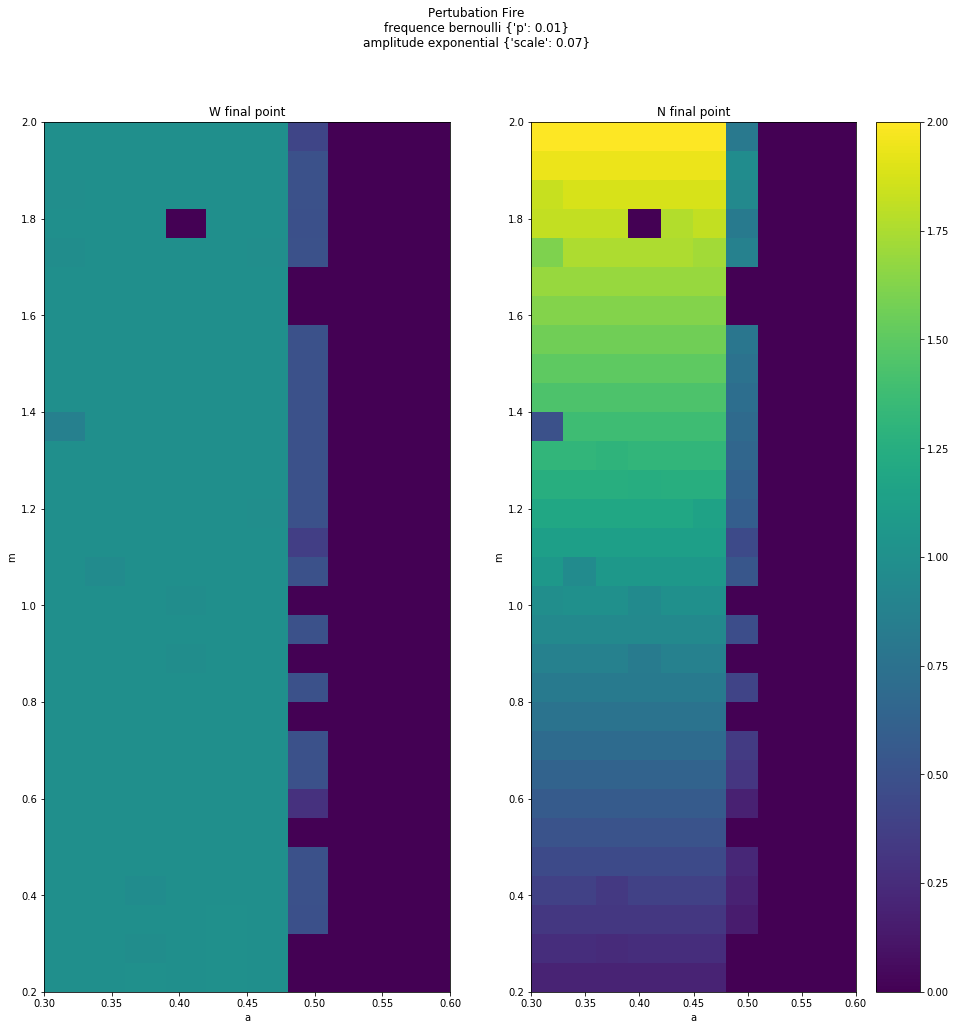

In [4]:
plt.figure(figsize = (16, 16))
#plt.title("Final point for different parameters")
plt.suptitle("Pertubation "+Fire_print(O.Fire))

mmax = max([np.max(Final_N), np.max(Final_W)])
plt.subplot(1,2,1)
extent = (Param1[0], Param1[-1], Param2[0], Param2[-1])
plt.imshow(Final_N[:,::-1].transpose(), extent = extent, vmin = 0, vmax = mmax, aspect = "auto")
#plt.colorbar()
plt.title("W final point")
plt.xlabel("a")
plt.ylabel("m")

plt.subplot(1,2,2)
plt.imshow(Final_W[:,::-1].transpose(), extent = extent, vmin = 0, vmax = mmax, aspect = "auto")
plt.colorbar()
plt.title("N final point")
plt.xlabel("a")
plt.ylabel("m")
